<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/hw7_recommendation_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811598 sha256=0cc678292eddc14365e9bebb67181860d95e3e31a39813252a78ce9f924a3576
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [8]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, NMF
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate

In [9]:
data = Dataset.load_builtin('ml-100k')
data

In [24]:
from numpy.core.fromnumeric import mean
# Cross validation for SVD algorithm.
algo = SVD()
cv_results = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)
svd_RMSE_mean = round(cv_results['test_rmse'].mean(), 4)
svd_MAE_mean = round(cv_results['test_mae'].mean(), 4)
svd_fit_time_mean = round(np.mean(cv_results['fit_time']), 4)
svd_test_time_mean = round(np.mean(cv_results['test_time']), 4)
print(f"Mean values for SVD: RMSE {svd_RMSE_mean}, MAE {svd_MAE_mean}")
print(f"Mean values for time: Fit time {svd_fit_time_mean}, Test time {svd_test_time_mean}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9336  0.9373  0.9358  0.9405  0.9350  0.9364  0.0023  
MAE (testset)     0.7366  0.7391  0.7363  0.7408  0.7380  0.7382  0.0017  
Fit time          1.75    2.02    1.50    1.58    1.70    1.71    0.18    
Test time         0.26    0.14    0.29    0.14    0.31    0.23    0.07    
Mean values for SVD: RMSE 0.9364, MAE 0.7382
Mean values for time: Fit time 1.7119, Test time 0.2258


In [23]:
# Cross validation for SVDpp algorithm.
algo_p = SVDpp()
svdpp_results = cross_validate(algo_p, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
svdpp_RMSE_mean = round(svdpp_results['test_rmse'].mean(), 4)
svdpp_MAE_mean = round(svdpp_results['test_mae'].mean(), 4)
svdpp_fit_time_mean = round(np.mean(svdpp_results['fit_time']), 4)
svdpp_test_time_mean = round(np.mean(svdpp_results['test_time']), 4)
print(f"Mean values for SVDpp: RMSE {svdpp_RMSE_mean}, MAE {svdpp_MAE_mean}")
print(f"Mean values for time: Fit time {svdpp_fit_time_mean}, Test time {svdpp_test_time_mean}")

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9195  0.9235  0.9194  0.9236  0.9155  0.9203  0.0030  
MAE (testset)     0.7214  0.7251  0.7204  0.7235  0.7188  0.7218  0.0022  
Fit time          28.34   34.80   28.25   27.21   27.47   29.22   2.83    
Test time         5.31    5.12    5.51    5.31    5.24    5.30    0.13    
Mean values for SVDpp: RMSE 0.9203, MAE 0.7218
Mean values for time: Fit time 29.2152, Test time 5.3006


In [26]:
# Cross validation for NMF algorithm.
algo_n = NMF()
nmf_results = cross_validate(algo_n, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
nmf_RMSE_mean = round(nmf_results['test_rmse'].mean(), 4)
nmf_MAE_mean = round(nmf_results['test_mae'].mean(), 4)
nmf_fit_time_mean = round(np.mean(nmf_results['fit_time']), 4)
nmf_test_time_mean = round(np.mean(nmf_results['test_time']), 4)
print(f"Mean values for NMF: RMSE {nmf_RMSE_mean}, MAE {nmf_MAE_mean}")
print(f"Mean values for time: Fit time {nmf_fit_time_mean}, Test time {nmf_test_time_mean}")

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9591  0.9623  0.9615  0.9728  0.9605  0.9632  0.0049  
MAE (testset)     0.7529  0.7550  0.7548  0.7616  0.7569  0.7562  0.0029  
Fit time          3.48    2.92    2.53    3.42    2.77    3.02    0.37    
Test time         0.20    0.33    0.12    0.29    0.12    0.21    0.09    
Mean values for NMF: RMSE 0.9632, MAE 0.7562
Mean values for time: Fit time 3.0244, Test time 0.2104


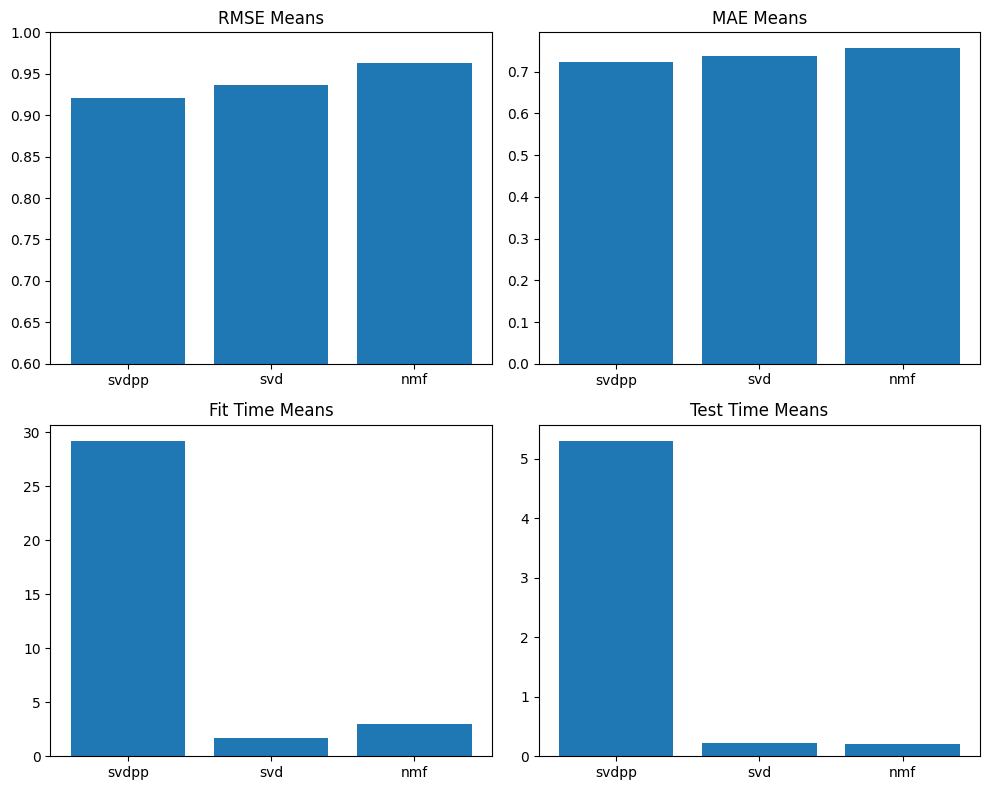

In [29]:
# Grafical explementation
import matplotlib.pyplot as plt

methods = ['svdpp', 'svd', 'nmf']
rmse_means = [svdpp_RMSE_mean, svd_RMSE_mean, nmf_RMSE_mean]
mae_means = [svdpp_MAE_mean, svd_MAE_mean, nmf_MAE_mean]
fit_time_means = [svdpp_fit_time_mean, svd_fit_time_mean, nmf_fit_time_mean]
test_time_means = [svdpp_test_time_mean, svd_test_time_mean, nmf_test_time_mean]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].bar(methods, rmse_means)
axs[0, 0].set_title('RMSE Means')
axs[0, 0].set_ylim(0.6, 1.0)

axs[0, 1].bar(methods, mae_means)
axs[0, 1].set_title('MAE Means')
axs[0, 0].set_ylim(0.6, 1.0)

axs[1, 0].bar(methods, fit_time_means)
axs[1, 0].set_title('Fit Time Means')

axs[1, 1].bar(methods, test_time_means)
axs[1, 1].set_title('Test Time Means')

plt.tight_layout()
plt.show()


Таким чином найнижчу помилку має метод SVDpp, а найвищу - NMF,  в той же час, SVDpp потребує найбільше часу, тому оптимальним варіантом є метод SVD